In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools

## 数据载入 ##

### 新时代标签数据 ###

In [2]:
tag_file = './xsd-tag-face-20180507.csv'
tag = pd.read_csv(tag_file)
tag.head()

,id,owner_id,photo_id,time,faceDetectRes,faceColor,faceGloss,lipDetectRes,lipColor,id.1,oss_id,upload_time,id.2,photo_id.1,photo_type,original_photo_id,original_result_id
0,1,90,1,2018-05-02 06:28:42,1,2.0,0.0,1.0,1.0,1,w-5/5FxPP-hI4YYU1J3QCyAj0mJqCO-u5ulRmAYtk7U28U...,2018-02-02 09:23:55,1,1,face,NaN,5
1,3,91,1,2018-05-02 06:58:38,1,2.0,0.0,1.0,1.0,1,w-5/5FxPP-hI4YYU1J3QCyAj0mJqCO-u5ulRmAYtk7U28U...,2018-02-02 09:23:55,1,1,face,NaN,5
2,333,93,1,2018-05-03 05:10:17,1,2.0,0.0,1.0,2.0,1,w-5/5FxPP-hI4YYU1J3QCyAj0mJqCO-u5ulRmAYtk7U28U...,2018-02-02 09:23:55,1,1,face,NaN,5
3,575,1,1,2018-05-07 00:25:48,1,2.0,0.0,1.0,2.0,1,w-5/5FxPP-hI4YYU1J3QCyAj0mJqCO-u5ulRmAYtk7U28U...,2018-02-02 09:23:55,1,1,face,NaN,5
4,2,90,2,2018-05-02 06:30:22,1,3.0,1.0,1.0,0.0,2,w-31/sGTYos0P3Z11c770qlozJDDCrGGKqbXHz4Yhpp-qz...,2018-02-05 03:28:05,2,2,face,NaN,111


In [3]:
tag.groupby('owner_id').count()[['id']]

,id
owner_id,
1,94
90,72
91,468
93,206
99,1


### 算法输出数据 ###

In [4]:
target_file = './zy-tag-face-20180507.csv'
target = pd.read_csv(target_file)
target.head()

,id,owner_id,photo_id,time,algorithm_version_id,diagnosis_raw,face_L,face_a,face_b,gloss,...,none_gloss,lip_L,lip_a,lip_b,faceDetectRes,faceColor,faceGloss,lipDetectRes,lipColor,agency_id
0,3658,4732,6930,2018-05-07 11:06:10,1,11,113.0,126.0,134.0,0.956392,...,0.728453,NaN,NaN,NaN,1,1.0,0.0,0,NaN,NaN
1,3657,4731,6929,2018-05-07 11:03:57,1,41151,149.0,137.0,141.0,0.801642,...,0.799734,112.0,151.0,139.0,1,5.0,1.0,1,4.0,NaN
2,3656,4729,6927,2018-05-07 08:54:38,1,41131,143.0,141.0,148.0,0.772053,...,0.784351,111.0,151.0,143.0,1,3.0,1.0,1,4.0,NaN
3,3655,4720,6925,2018-05-07 07:54:06,1,41151,134.0,140.0,147.0,0.799565,...,0.822422,95.0,154.0,142.0,1,5.0,1.0,1,4.0,NaN
4,3654,4730,6923,2018-05-07 07:45:01,1,1201,168.0,140.0,144.0,0.858614,...,0.923527,134.0,150.0,141.0,1,0.0,2.0,1,0.0,NaN


In [5]:
suffixes = ['.tag', '.raw']
merged = tag.merge(target, left_on='original_result_id', right_on='photo_id', suffixes=suffixes)
merged.head()

,id.tag,owner_id.tag,photo_id.tag,time.tag,faceDetectRes.tag,faceColor.tag,faceGloss.tag,lipDetectRes.tag,lipColor.tag,id.1,...,none_gloss,lip_L,lip_a,lip_b,faceDetectRes.raw,faceColor.raw,faceGloss.raw,lipDetectRes.raw,lipColor.raw,agency_id
0,1,90,1,2018-05-02 06:28:42,1,2.0,0.0,1.0,1.0,1,...,0.852593,24.0,131.0,132.0,1,5.0,2.0,1,4.0,NaN
1,3,91,1,2018-05-02 06:58:38,1,2.0,0.0,1.0,1.0,1,...,0.852593,24.0,131.0,132.0,1,5.0,2.0,1,4.0,NaN
2,333,93,1,2018-05-03 05:10:17,1,2.0,0.0,1.0,2.0,1,...,0.852593,24.0,131.0,132.0,1,5.0,2.0,1,4.0,NaN
3,575,1,1,2018-05-07 00:25:48,1,2.0,0.0,1.0,2.0,1,...,0.852593,24.0,131.0,132.0,1,5.0,2.0,1,4.0,NaN
4,2,90,2,2018-05-02 06:30:22,1,3.0,1.0,1.0,0.0,2,...,0.918257,151.0,152.0,143.0,1,5.0,2.0,1,0.0,NaN


In [6]:
(tag['id'].count(), merged['id.tag'].count())

(841, 841)

### 数据匹配 ###

联合后的结果如下。

只选取感兴趣的三个特征列，以及两个表示面/唇有没有被识别到的列

In [7]:
features = 'faceDetectRes faceColor faceGloss lipDetectRes lipColor'.split()
interested = [''.join(x) for x in itertools.product(features, suffixes)]
meta_columns = ['owner_id.tag', 'id.tag', 'id.raw', 'photo_id.tag', 'original_result_id', 'photo_id.raw']
result = merged[meta_columns + interested]
result.head()

,owner_id.tag,id.tag,id.raw,photo_id.tag,original_result_id,photo_id.raw,faceDetectRes.tag,faceDetectRes.raw,faceColor.tag,faceColor.raw,faceGloss.tag,faceGloss.raw,lipDetectRes.tag,lipDetectRes.raw,lipColor.tag,lipColor.raw
0,90,1,3,1,5,5,1,1,2.0,5.0,0.0,2.0,1.0,1,1.0,4.0
1,91,3,3,1,5,5,1,1,2.0,5.0,0.0,2.0,1.0,1,1.0,4.0
2,93,333,3,1,5,5,1,1,2.0,5.0,0.0,2.0,1.0,1,2.0,4.0
3,1,575,3,1,5,5,1,1,2.0,5.0,0.0,2.0,1.0,1,2.0,4.0
4,90,2,60,2,111,111,1,1,3.0,5.0,1.0,2.0,1.0,1,0.0,0.0


### 面部识别有无不一致 ###

确定双方都识别出了面部


In [8]:
result[result['faceDetectRes.raw'] != result['faceDetectRes.tag']].shape[0]

1

### 识别唇部有无不一致 ##

确定双方都识别出了唇部。事实上我们的算法没有识别出一部分图片中的唇部。

In [9]:
result[result['lipDetectRes.raw'] != result['lipDetectRes.tag']].shape[0]

16

## 原始数据对比 ##

以下部分对比双方给出的原始数据（未作任何变换）。


### 判断双方给出的特征是否一致 ###

增加三个列：`faceColor.same`、`faceGloss.same`、`lipColor.same`，分别表示双方判定的面色、光泽、唇色是否相同。

如果面、唇没有检测出来，对应的特征会被置为`None`，所以肯定是不等的，不用做特殊处理。

In [10]:
result['faceColor.same'] = (result['faceColor.raw'] == result['faceColor.tag'])
result['faceGloss.same'] = (result['faceGloss.raw'] == result['faceGloss.tag'])
result['lipColor.same'] = (result['lipColor.raw'] == result['lipColor.tag'])
result['count.same'] = result[['faceColor.same', 'faceGloss.same', 'lipColor.same']].sum(axis=1)
result.head()

/home/genzj/.virtualenvs/test/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/genzj/.virtualenvs/test/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/genzj/.virtualenvs/test/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,owner_id.tag,id.tag,id.raw,photo_id.tag,original_result_id,photo_id.raw,faceDetectRes.tag,faceDetectRes.raw,faceColor.tag,faceColor.raw,faceGloss.tag,faceGloss.raw,lipDetectRes.tag,lipDetectRes.raw,lipColor.tag,lipColor.raw,faceColor.same,faceGloss.same,lipColor.same,count.same
0,90,1,3,1,5,5,1,1,2.0,5.0,0.0,2.0,1.0,1,1.0,4.0,False,False,False,0
1,91,3,3,1,5,5,1,1,2.0,5.0,0.0,2.0,1.0,1,1.0,4.0,False,False,False,0
2,93,333,3,1,5,5,1,1,2.0,5.0,0.0,2.0,1.0,1,2.0,4.0,False,False,False,0
3,1,575,3,1,5,5,1,1,2.0,5.0,0.0,2.0,1.0,1,2.0,4.0,False,False,False,0
4,90,2,60,2,111,111,1,1,3.0,5.0,1.0,2.0,1.0,1,0.0,0.0,False,False,True,1


### 双方标签一致情况 ###

不做任何处理的话，一致性很差。`count.same`是双方给出相同特征的记录数，完全相同的（即`count.same`=3）只有4条（占0.47%）。

面色标签有6种，光泽3种，唇色5种。总的组合有$6\times3\times5=90$种，完全随机的情况下比例是$1\div90=1.11\%$，现在的情况比随机还差，推测是有稳定的偏差存在。

,count,percentage
count.same,,
0,309,36.741974
1,398,47.324614
2,130,15.457788
3,4,0.475624


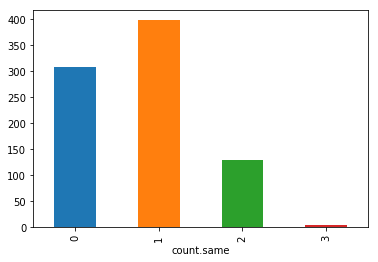

In [11]:
ans = result.groupby('count.same').count()[['id.tag']]
ans.columns = ['count']
ans['percentage'] = ans / ans['count'].sum() * 100
ans['count'].plot(kind='bar')
ans

### 一致性 ###

用最宽泛的一致性定义，定义只要有一个标签相同即为一致，此时的一致性也只有63.25%

In [12]:
result[result['count.same'] > 0].shape[0] / result.shape[0]

0.6325802615933412

## 数据映射处理 ##

下面对数据做一些映射和手动分组，提高一致性比例

### 分析 ###

分析各个标签的一致性情况。存在偏差的行占比都在50%以上，最严重的是唇色。

In [13]:
result[['faceColor.same', 'lipColor.same', 'faceGloss.same']].sum(axis=0)

faceColor.same    309
lipColor.same      89
faceGloss.same    272
dtype: int64

### 唇色 ###

先从分离最严重的唇色开始做变换。

分析唇色的分布，算法输出(`raw`)最多的是4（紫）、0（白）、3（暗红），人工标签`tag`最多的是1（淡红）、2（红）、3（暗红）。

In [14]:
result['lipColor.raw'].value_counts(sort=True)

4.0    357
0.0    238
3.0    138
1.0     62
2.0     31
Name: lipColor.raw, dtype: int64

In [15]:
result['lipColor.tag'].value_counts(sort=True)

1.0    453
2.0    226
3.0    127
0.0     23
4.0     11
Name: lipColor.tag, dtype: int64

要提高一致性，算法上可以做一个调整或者简单地变换，减少紫和白的比例（实际上这两种唇色也少），放到淡红、红色来。现在直接做个暴力的变换，把两边占比最高的几组强行分配到一起，作为相等对待。一致性可以提高到92.5%

In [16]:
result['grouped.lipColor.same'] = (
    result['lipColor.tag'].isin([1.0, 2.0, 3.0]) & result['lipColor.raw'].isin([4.0, 0.0, 3.0])
) | (
    result['lipColor.raw'] == result['lipColor.tag']
)
(result['grouped.lipColor.same'].sum(), result['grouped.lipColor.same'].sum() / result.shape[0])

/home/genzj/.virtualenvs/test/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(778, 0.925089179548157)

### 面色 ###

对面色做类似的分析和变换，就简单地认为0和5(面白、面正常）都算正常

In [17]:
result['faceColor.raw'].value_counts(sort=True)

0.0    365
5.0    310
3.0     73
2.0     37
1.0     29
4.0     27
Name: faceColor.raw, dtype: int64

In [18]:
result['faceColor.tag'].value_counts(sort=True)

5.0    678
0.0     57
3.0     42
2.0     42
4.0     13
1.0      8
Name: faceColor.tag, dtype: int64

变换后一致性有74.43%

In [19]:
result['grouped.faceColor.same'] = (
    result['faceColor.raw'].isin([0, 5]) & result['faceColor.tag'].isin([0, 5])
) | (
    result['faceColor.raw'] == result['faceColor.tag']
)
(result['grouped.faceColor.same'].sum(), result['grouped.faceColor.same'].sum() / result.shape[0])

/home/genzj/.virtualenvs/test/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(626, 0.7443519619500595)

### 面光泽 ###

对面光泽做类似的分析和变换，明显算法输出偏暗，基本平均分布，少光泽和无光泽更多。人工标签有光泽更多。这里就把有光泽和少光泽归并作为有光泽处理。一致性可以提高到65.04%

In [20]:
result['faceGloss.raw'].value_counts(sort=True)

1.0    305
2.0    282
0.0    254
Name: faceGloss.raw, dtype: int64

In [21]:
result['faceGloss.tag'].value_counts(sort=True)

0.0    637
1.0    181
2.0     22
Name: faceGloss.tag, dtype: int64

In [22]:
result['grouped.faceGloss.same'] = (
    result['faceGloss.raw'].isin([0, 1]) & result['faceGloss.tag'].isin([0, 1])
) | (
    result['faceGloss.raw'] == result['faceGloss.tag']
)
(result['grouped.faceGloss.same'].sum(), result['grouped.faceGloss.same'].sum() / result.shape[0])

/home/genzj/.virtualenvs/test/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(547, 0.6504161712247325)

### 变换后的总体一致性 ###

基于变换后的结果，再做一致性分析。

/home/genzj/.virtualenvs/test/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,count,percentage
grouped.count.same,,
0,4,0.475624
1,97,11.533888
2,366,43.519620
3,374,44.470868


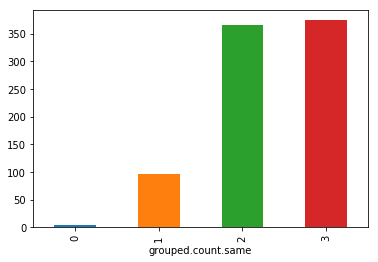

In [23]:
result['grouped.count.same'] = result[[
    'grouped.faceColor.same', 'grouped.faceGloss.same', 'grouped.lipColor.same'
]].sum(axis=1)

grouped_ans = result.groupby('grouped.count.same').count()[['id.tag']]
grouped_ans.columns = ['count']
grouped_ans['percentage'] = grouped_ans / grouped_ans['count'].sum() * 100
grouped_ans['count'].plot(kind='bar')
grouped_ans

调整后一致性高很多，完全一致的占44.47%，仅有一项特征不一致的占43.52%

我们可以定义一致性为`所有标签取值完全一致，或仅有一个标签取值不一致`，此时最终一致性为$44.47\% + 43.52\% = 87.99\%$.

## 小结 ##

上面的分析和变换没有医学意义，也不被中医理论体系支持，仅仅是为了增大统计值所作的集合映射。

要想让结果比较理想，首先可以根据对方打标签的结果，在算法里做类似的映射变换，甚至调整结果使其服从对方标签的统计分布。

其次还是要看到，做了比较暴力的变换后，标签完全相同的比率也不到50%，要说服对方接受我们对一致性的定义，如果以标签完全相同作为一致的标准，会对我们工作不利。

$\blacksquare$